In [2]:
# Sample Text

txt1="The easiest way to earn points with Fetch Rewards is to just shop for the products you already love. If you have any participating brands on your receipt, you'll get points based on the cost of the products. You don't need to clip any coupons or scan individual barcodes. Just scan each grocery receipt after you shop and we'll find the savings for you."
txt2="The easiest way to earn points with Fetch Rewards is to just shop for the items you already buy. If you have any eligible brands on your receipt, you will get points based on the total cost of the products. You do not need to cut out any coupons or scan individual UPCs. Just scan your receipt after you check out and we will find the savings for you."
txt3="We are always looking for opportunities for you to earn more points, which is why we also give you a selection of Special Offers. These Special Offers are opportunities to earn bonus points on top of the regular points you earn every time you purchase a participating brand. No need to pre-select these offers, we'll give you the points whether or not you knew about the offer. We just think it is easier that way."

# Using Cosine Similarity (Frequncy Based similarity)

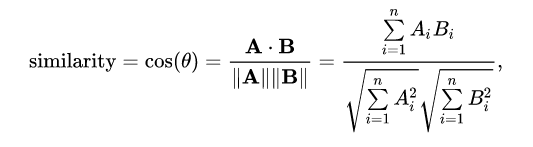

In [3]:
from IPython.display import Image
Image(filename='C:/Users/siddh/Desktop/Fetch FT Challenge/DE/test.png') 

In [4]:
import math
import re
from collections import Counter

WORD = re.compile(r"\w+")
def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])
    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)

### Sample Example

In [17]:
vector1 = text_to_vector(txt1.lower())
vector2 = text_to_vector(txt2.lower())
vector3 = text_to_vector(txt3.lower())

print("Cosine Similarity between text 1 and text 2: ", get_cosine(vector1, vector2))
print("Cosine Similarity between text 1 and text 3: ", get_cosine(vector1, vector3))
print("Cosine Similarity between text 2 and text 3: ", get_cosine(vector2, vector3))

Cosine Similarity between text 1 and text 2:  0.8889103231346543
Cosine Similarity between text 1 and text 3:  0.5912782150938842
Cosine Similarity between text 2 and text 3:  0.5745586133367577


# Post processing (Removal of abriviations and some stopwords) 
## The stopword list was found from nltk api documentation 

In [5]:
def clean(text):
    if type(text) != str or text=='':
        return ''
    # Clean the text 
    text = text.lower() #change to lower case
    text = re.sub(r'\s+', ' ', text)    
    text = re.sub("\'s", " ", text) # For cases with 's '
    text = re.sub(r'[^\w\s]','',text)     #remove commas
    stopwords=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
    #clean the data to remove stopwords
    word_tokens = text.split(' ')
    filtered_sentence = [w for w in word_tokens if not w in stopwords]
    #Return a list of words
    return Counter(filtered_sentence)

### Sample Example

In [18]:
ctxt1=clean(txt1)
ctxt2=clean(txt2)
ctxt3=clean(txt3)

print("Cosine Similarity between text 1 and text 2: ", get_cosine(ctxt1, ctxt2))
print("Cosine Similarity between text 1 and text 3: ", get_cosine(ctxt1, ctxt3))
print("Cosine Similarity between text 2 and text 3: ", get_cosine(ctxt2, ctxt3))

Cosine Similarity between text 1 and text 2:  0.7879092800517908
Cosine Similarity between text 1 and text 3:  0.2794599840399787
Cosine Similarity between text 2 and text 3:  0.26470046277199466


### Significant drop in similarity as stopwords are fillers that don't add value to our text but are high in frequency hence removal leads to drop 

# Final Function for custom tests and use cases  
   ## Method Signature ==> checksimilarity(customtxt1,customtxt2,to_clean?) 
   ## Default it will not clean, pass True to clean text 

In [12]:
def checksimilarity(txt1,txt2,cln=False):
    if cln==False:
        return "Cosine Similarity between text 1 and text 2: ", get_cosine(text_to_vector(txt1.lower()),text_to_vector(txt2.lower()))
    else:
        return "Cosine Similarity between cleaned text 1 and text 2: ", get_cosine(clean(txt1),clean(txt2))

In [19]:
checksimilarity('Siddhant Modi','Data Engineer') # Based on previous submission :( 

('Cosine Similarity between text 1 and text 2: ', 0.0)